In [101]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth, DBSCAN

In [130]:
df = pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0, 0.5, 'Charges')

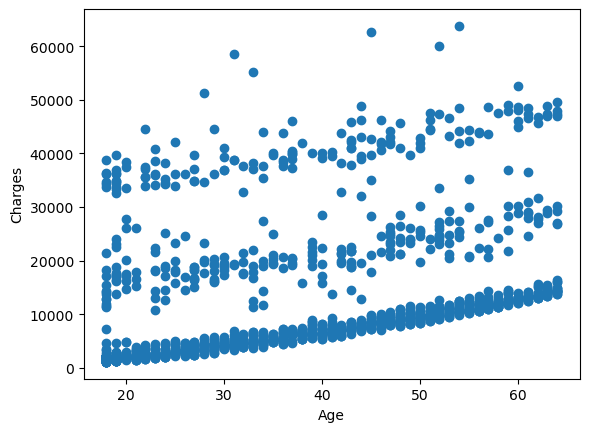

In [132]:
plt.scatter(df['age'],df['charges'])
plt.xlabel('Age')
plt.ylabel('Charges')

In [133]:
df = df.drop(['region', 'sex', 'smoker'], axis=1)

In [134]:
# Drop the last numeric column ('charges') for unsupervised clustering
X = df.iloc[:, :].values

In [135]:
# Create the model with a number that might make sensebased on the visualization
from sklearn.cluster import KMeans
n_clusters = 5
model = KMeans(n_clusters=n_clusters, random_state=0)

In [136]:
y = model.fit_predict(X)
print(y)

[0 2 2 ... 2 2 3]


In [137]:
# Determine the Centroids for visualization
centres=model.cluster_centers_
print(centres)

[[5.05874126e+01 3.06146329e+01 1.00349650e+00 1.32103370e+04]
 [3.95194805e+01 3.50794805e+01 1.12987013e+00 4.12837750e+04]
 [2.54123457e+01 2.98858642e+01 7.75308642e-01 3.24859349e+03]
 [4.34444444e+01 2.82325817e+01 1.24183007e+00 2.33512675e+04]
 [4.40176471e+01 3.07242353e+01 1.47058824e+00 8.03394989e+03]]


Text(0, 0.5, 'Charges')

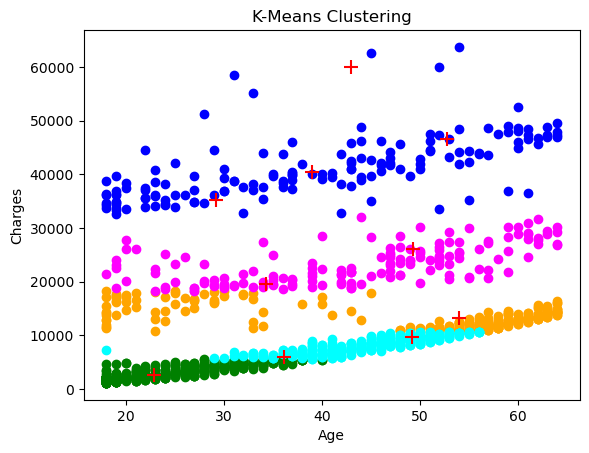

In [145]:
import matplotlib.pyplot as plt
colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red']
for i in range(n_clusters):
    plt.scatter(X[y == i, 0], X[y == i, 3], c=colors[i])
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 3], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Charges')

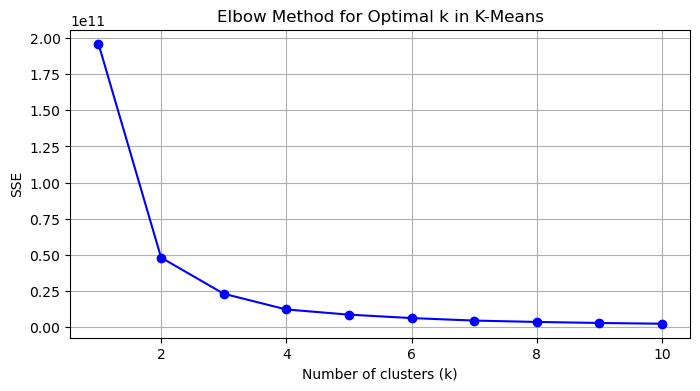

In [144]:
# Step 2: KMeans - Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertia.append(model.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal k in K-Means')
plt.grid(True)
plt.show()

Text(0, 0.5, 'Charges')

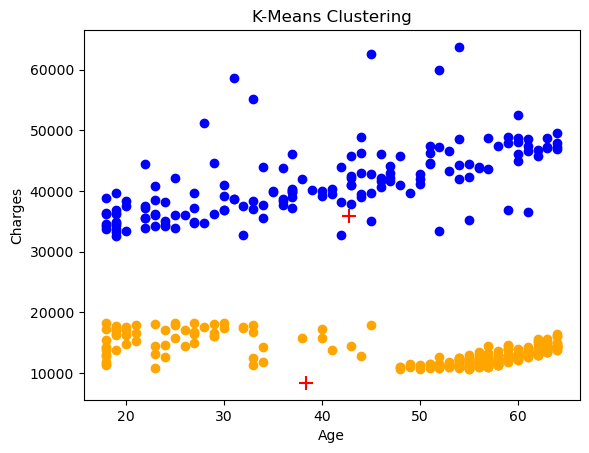

In [155]:
# Step 3: Clustering
optimal_k = 2  # Based on elbow method
model2 = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
y2 = model2.fit_predict(X)
centres2=model2.cluster_centers_

colors = ['orange', 'blue', 'green', 'magenta', 'cyan', 'red']
for i in range(optimal_k):
    plt.scatter(X[y == i, 0], X[y == i, 3], c=colors[i])
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 3], color='red', marker='+', s=100)
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Charges')


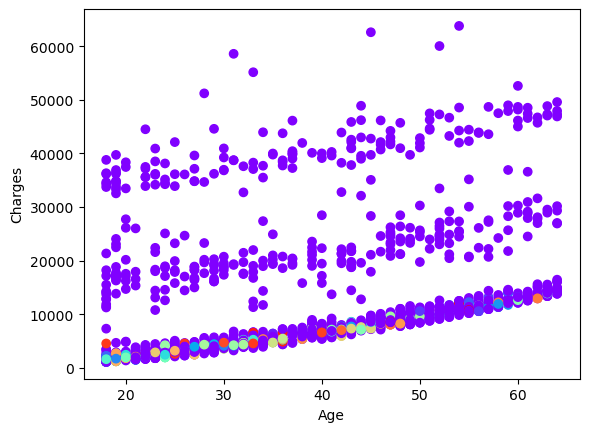

In [164]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=9.25, min_samples = 3)
clusters = dbscan.fit_predict(X)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 3], c=clusters, cmap="rainbow")

plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#### DBSCAN clustering cannot be used for this dataset looking at the chart above, which shows that data are almost all the points are of the same cluster.